In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, classification_report
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import NuSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
white = pd.read_csv('C:/Users/ripea/Downloads/winequality-white.csv', sep = ';')

In [94]:
white.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [9]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


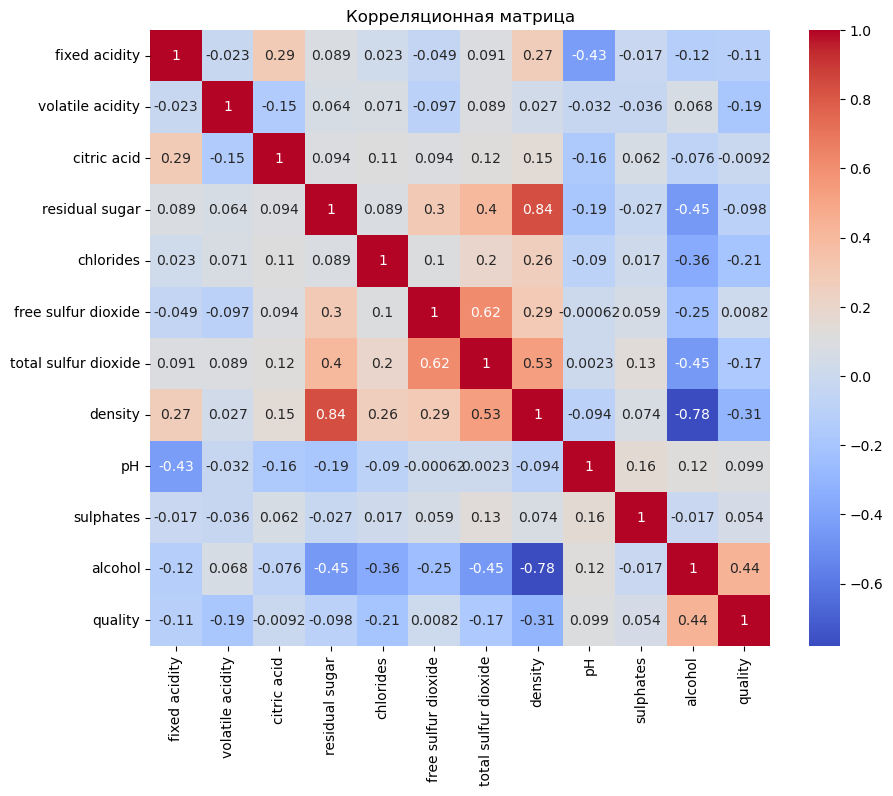

In [13]:
correlation_matrix = white.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

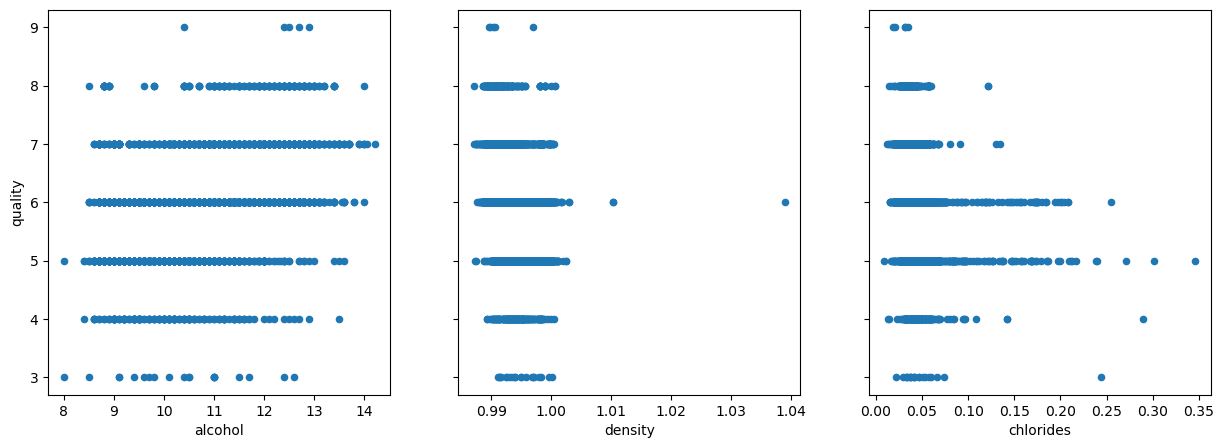

In [15]:
fig, axs = plt.subplots(1, 3, sharey = True)
white.plot(kind = 'scatter', x = 'alcohol', y = 'quality', ax = axs[0], figsize = (15, 5))
white.plot(kind = 'scatter', x = 'density', y = 'quality', ax = axs[1])
white.plot(kind = 'scatter', x = 'chlorides', y = 'quality', ax = axs[2])
plt.show()

In [100]:
X = white.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9, 10]].values
y = white.iloc[:, 11]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

In [102]:
model_linear = SVC(kernel = 'linear').fit(X_train, y_train)
model_rbf = SVC(kernel = 'rbf', gamma = 'auto', probability = True).fit(X_train, y_train)
model_poly = SVC(kernel = 'poly', degree = 2).fit(X_train, y_train)
model_sigmoid = SVC(kernel = 'sigmoid').fit(X_train, y_train)

In [103]:
y_pred_linear = model_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(accuracy_linear)

y_pred_rbf = model_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(accuracy_rbf)

y_pred_poly = model_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(accuracy_poly)

y_pred_sigmoid = model_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print(accuracy_sigmoid)

0.5104124132298897
0.5377705185790118
0.4463046141282156
0.31114740710494077


In [70]:
red = pd.read_csv('C:/Users/ripea/Downloads/winequality-red.csv', sep = ';')

In [72]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


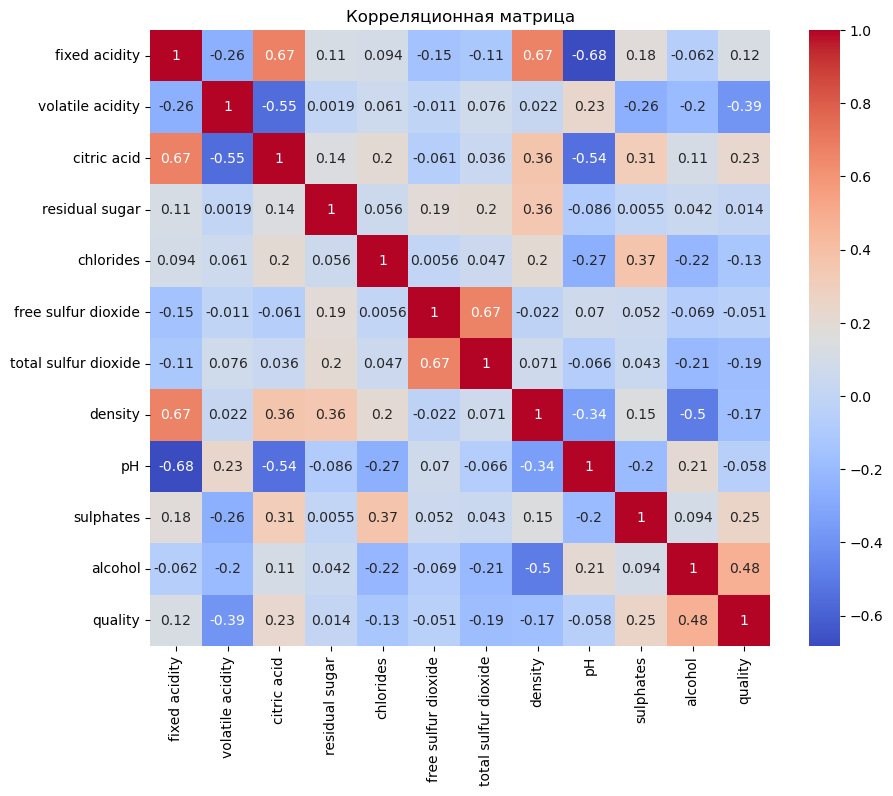

In [73]:
correlation_matrix = red.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [86]:
X = red.iloc[:, [0, 1, 2, 3, 4, 6, 7, 8, 9, 10]].values
y = red.iloc[:, 11]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

In [88]:
model_linear = SVC(kernel='linear').fit(X_train, y_train)
model_rbf = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
model_poly = SVC(kernel='poly', degree=2).fit(X_train, y_train)
model_sigmoid = SVC(kernel='sigmoid').fit(X_train, y_train)

In [89]:
y_pred_linear = model_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(accuracy_linear)

y_pred_rbf = model_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(accuracy_rbf)

y_pred_poly = model_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(accuracy_poly)

y_pred_sigmoid = model_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print(accuracy_sigmoid)

0.56375
0.53875
0.46625
0.325
